In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression 
from sklearn.metrics import r2_score
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
import seaborn as sns

%matplotlib inline

## -------------------------- Load and Read Dataset -----------------------------

In [2]:
# Load Dataset
cnr=pd.read_csv('data.csv')
cnr.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [3]:
cnr.shape

(569, 32)

## ----------------- Encoding categorical data values -----------------------

In [4]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
label = le.fit_transform(cnr['diagnosis'])
label

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1,
       0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1,
       0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1,
       1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0,
       0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1,
       1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1,

#####  so here 1 is malignant , 0 is benign

In [5]:
# appending converted column in our original dataframe
cnr['diagnosis']=label
cnr.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,1,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,1,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,1,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,1,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [6]:
# ID is not required in analysis

cnr=cnr.drop(['id'],axis=1)
cnr.head()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,1,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,1,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,1,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,1,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


## ----------------------------------------- predictor and target --------------------------

In [7]:
# droping diagnosis column
X=cnr.drop(['diagnosis'],axis=1)
X.head()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [8]:
y=cnr.diagnosis
y.head()

0    1
1    1
2    1
3    1
4    1
Name: diagnosis, dtype: int32

## --------------------- train validation and split -----------------------------------------

In [9]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2)

In [10]:
#train validation split
X_train,X_valid,y_train,y_valid=train_test_split(X_train,y_train,test_size=0.25)

In [11]:
X_train.head()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
362,12.760,18.84,81.87,496.6,0.09676,0.07952,0.026880,0.017810,0.1759,0.06183,...,13.750,25.99,87.82,579.7,0.12980,0.18390,0.1255,0.08312,0.2744,0.07238
525,8.571,13.10,54.53,221.3,0.10360,0.07632,0.025650,0.015100,0.1678,0.07126,...,9.473,18.45,63.30,275.6,0.16410,0.22350,0.1754,0.08512,0.2983,0.10490
306,13.200,15.82,84.07,537.3,0.08511,0.05251,0.001461,0.003261,0.1632,0.05894,...,14.410,20.45,92.00,636.9,0.11280,0.13460,0.0112,0.02500,0.2651,0.08385
464,13.170,18.22,84.28,537.3,0.07466,0.05994,0.048590,0.028700,0.1454,0.05549,...,14.900,23.89,95.10,687.6,0.12820,0.19650,0.1876,0.10450,0.2235,0.06925
568,7.760,24.54,47.92,181.0,0.05263,0.04362,0.000000,0.000000,0.1587,0.05884,...,9.456,30.37,59.16,268.6,0.08996,0.06444,0.0000,0.00000,0.2871,0.07039


## ---------------- data exploration ------------------------------------

In [12]:
# checking how much null values are present 

X_train.isnull().sum()

radius_mean                0
texture_mean               0
perimeter_mean             0
area_mean                  0
smoothness_mean            0
compactness_mean           0
concavity_mean             0
concave points_mean        0
symmetry_mean              0
fractal_dimension_mean     0
radius_se                  0
texture_se                 0
perimeter_se               0
area_se                    0
smoothness_se              0
compactness_se             0
concavity_se               0
concave points_se          0
symmetry_se                0
fractal_dimension_se       0
radius_worst               0
texture_worst              0
perimeter_worst            0
area_worst                 0
smoothness_worst           0
compactness_worst          0
concavity_worst            0
concave points_worst       0
symmetry_worst             0
fractal_dimension_worst    0
dtype: int64

In [13]:
X_train.describe()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
count,341.000000,341.000000,341.000000,341.000000,341.000000,341.000000,341.000000,341.000000,341.000000,341.000000,...,341.000000,341.000000,341.000000,341.000000,341.000000,341.000000,341.000000,341.000000,341.000000,341.000000
mean,14.119704,19.117859,91.820352,655.269208,0.096476,0.102425,0.087262,0.048006,0.180403,0.062740,...,16.245038,25.384721,106.829296,879.681232,0.131545,0.248679,0.270238,0.112793,0.288540,0.083584
std,3.548199,4.381629,24.279838,352.472342,0.013967,0.048786,0.076631,0.036422,0.026178,0.007452,...,4.848118,6.221423,33.347154,570.631488,0.022301,0.154714,0.209997,0.063917,0.063901,0.018817
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.050240,...,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,11.710000,15.900000,75.030000,420.300000,0.086620,0.066850,0.030360,0.020690,0.162700,0.057150,...,13.060000,20.740000,84.460000,516.500000,0.116200,0.146000,0.116700,0.062960,0.247300,0.070830
50%,13.370000,18.590000,86.490000,551.100000,0.096670,0.093620,0.059990,0.033340,0.178800,0.061400,...,14.970000,25.090000,97.900000,686.500000,0.131300,0.209700,0.226400,0.099930,0.280700,0.079240
75%,15.850000,21.590000,104.100000,782.700000,0.105100,0.129600,0.120100,0.070170,0.194800,0.066150,...,18.510000,29.110000,126.700000,1044.000000,0.144200,0.317200,0.378800,0.157100,0.315700,0.091800
max,28.110000,39.280000,188.500000,2501.000000,0.163400,0.283900,0.410800,0.168900,0.267800,0.097440,...,36.040000,47.160000,251.200000,4254.000000,0.218400,1.058000,1.252000,0.290300,0.663800,0.207500


##### As seen above most the features are skewed

## ------------------------------------------- data visualization -----------------------------------------

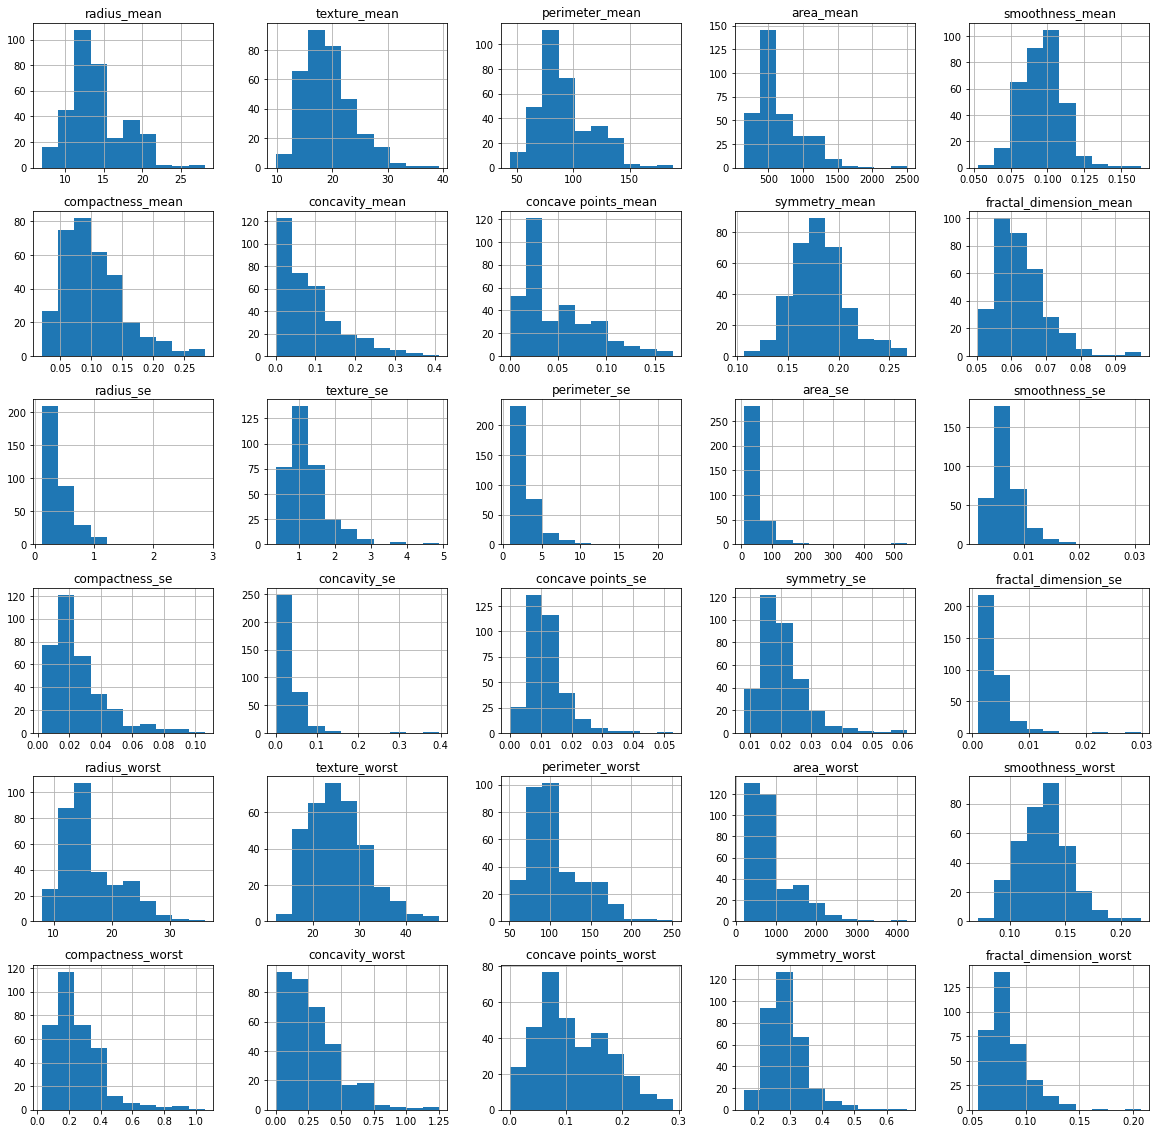

In [14]:
# we can infer the counts of each feature with the help of histogram

X_train.hist(bins=10,figsize=(20,20))
plt.show()

<AxesSubplot:xlabel='area_mean', ylabel='smoothness_mean'>

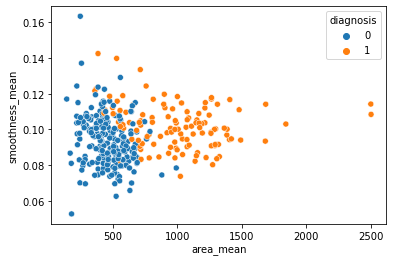

In [15]:
sns.scatterplot(x='area_mean',y='smoothness_mean',hue=y_train,data =X_train)

In [16]:
# finding corelation between each variables

X_train.corr()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
radius_mean,1.000000,0.347368,0.998179,0.985500,0.070931,0.458267,0.634657,0.809535,0.101838,-0.388185,...,0.966015,0.318861,0.961349,0.932313,0.022055,0.367661,0.478138,0.716892,0.112440,-0.049140
texture_mean,0.347368,1.000000,0.349373,0.347604,-0.095601,0.193574,0.297240,0.292250,0.030346,-0.169408,...,0.383585,0.906646,0.383495,0.379814,0.004944,0.245759,0.293598,0.278511,0.067664,0.054239
perimeter_mean,0.998179,0.349373,1.000000,0.985459,0.103543,0.506026,0.671564,0.835921,0.133095,-0.343777,...,0.966655,0.320809,0.966576,0.934229,0.048726,0.407874,0.513618,0.742887,0.135122,-0.006841
area_mean,0.985500,0.347604,0.985459,1.000000,0.083621,0.450478,0.648208,0.809443,0.107473,-0.354763,...,0.957554,0.310287,0.954644,0.951343,0.027862,0.342166,0.465217,0.692409,0.092838,-0.052017
smoothness_mean,0.070931,-0.095601,0.103543,0.083621,1.000000,0.620440,0.437123,0.480024,0.560493,0.582400,...,0.122116,-0.032350,0.146141,0.124123,0.811963,0.456206,0.384909,0.451723,0.406322,0.529748
compactness_mean,0.458267,0.193574,0.506026,0.450478,0.620440,1.000000,0.854909,0.805989,0.593133,0.538168,...,0.498792,0.205330,0.548566,0.473601,0.522133,0.866661,0.804829,0.801940,0.504165,0.710049
concavity_mean,0.634657,0.297240,0.671564,0.648208,0.437123,0.854909,1.000000,0.905099,0.475074,0.290641,...,0.651915,0.290106,0.688936,0.642719,0.359800,0.726983,0.882193,0.846849,0.382539,0.503155
concave points_mean,0.809535,0.292250,0.835921,0.809443,0.480024,0.805989,0.905099,1.000000,0.449975,0.098765,...,0.820236,0.289765,0.842300,0.796953,0.377047,0.649038,0.738705,0.904139,0.361479,0.348916
symmetry_mean,0.101838,0.030346,0.133095,0.107473,0.560493,0.593133,0.475074,0.449975,1.000000,0.486070,...,0.141607,0.058174,0.171308,0.136785,0.423627,0.463611,0.423877,0.421545,0.693302,0.471964
fractal_dimension_mean,-0.388185,-0.169408,-0.343777,-0.354763,0.582400,0.538168,0.290641,0.098765,0.486070,1.000000,...,-0.323898,-0.150972,-0.281660,-0.294396,0.482294,0.429712,0.310914,0.121742,0.337717,0.775862


<AxesSubplot:>

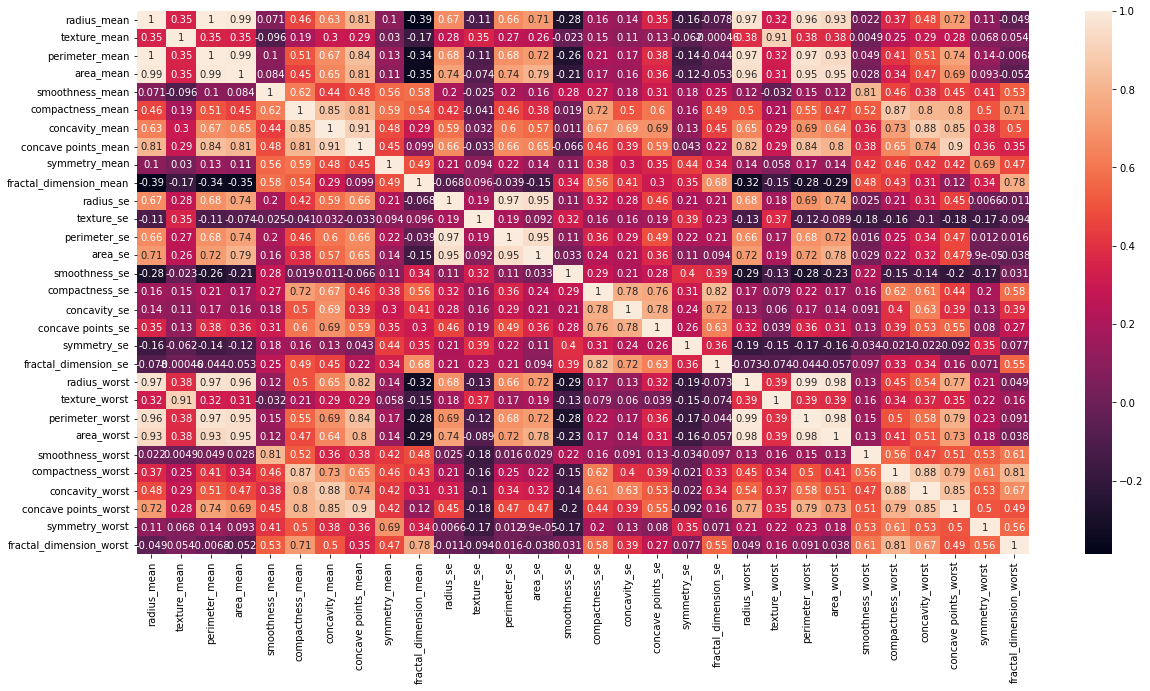

In [17]:
# plotting above co realtion using heat map

plt.figure(figsize =(20,10))
sns.heatmap(X_train.corr(), annot =True)

## ----------------------- Model selection -------------------------------

### 1. Decision tree

In [18]:
## fitting decision tree regressor

reg_tree=DecisionTreeRegressor(max_depth=3,min_samples_leaf=5) #each leaf should have atleast 5 sample -- min obs u want in ur saple
reg_tree.fit(X_train,y_train)

DecisionTreeRegressor(max_depth=3, min_samples_leaf=5)

In [19]:
# prediction 
y_pred=reg_tree.predict(X_valid)
y_pred

array([1.        , 0.8       , 1.        , 0.38095238, 1.        ,
       0.01477833, 0.01477833, 1.        , 0.01477833, 1.        ,
       0.01477833, 1.        , 0.01477833, 1.        , 0.01477833,
       1.        , 0.01477833, 0.38095238, 0.01477833, 1.        ,
       1.        , 0.01477833, 0.01477833, 0.01477833, 0.01477833,
       0.01477833, 1.        , 0.01477833, 1.        , 0.01477833,
       0.01477833, 0.01477833, 0.01477833, 0.01477833, 0.01477833,
       1.        , 1.        , 0.01477833, 0.01477833, 0.01477833,
       0.01477833, 1.        , 1.        , 0.01477833, 0.01477833,
       0.01477833, 0.38095238, 0.01477833, 0.01477833, 0.01477833,
       0.38095238, 0.8       , 1.        , 1.        , 1.        ,
       0.01477833, 1.        , 0.01477833, 0.01477833, 1.        ,
       1.        , 0.38095238, 1.        , 0.01477833, 1.        ,
       0.01477833, 1.        , 0.38095238, 1.        , 1.        ,
       0.01477833, 0.01477833, 1.        , 1.        , 0.01477

In [20]:
# checking accuracy 

accuracy_score(y_valid,y_pred.round())

0.9210526315789473

In [21]:
# model performance check

#MAE 
np.mean(np.abs(y_valid-y_pred))

0.08373520006913843

In [22]:
#MSE
np.mean((y_valid-y_pred)**2)

0.05384417860989794

In [23]:
# Hyper parameter tuning choosing best depth

depth=np.arange(1,15)
mae=[]

for k in depth:
    reg_tree=DecisionTreeRegressor(max_depth=k,min_samples_leaf=5)
    reg_tree.fit(X_train,y_train)
    y_pred=reg_tree.predict(X_valid)
    mae.append(np.mean(np.abs(y_valid-y_pred)))  #MAD

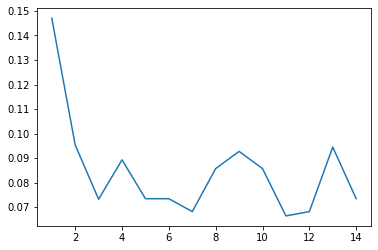

In [24]:
plt.plot(depth,np.array(mae))
plt.show()

##### final testing for Decision tree , from above we see depth should be taken as 12 for that error is min.

In [25]:
reg_tree_fin=DecisionTreeRegressor(max_depth=12,min_samples_leaf=5) 
reg_tree_fin.fit(X_test,y_test)
# prediction 
y_pred_fin=reg_tree_fin.predict(X_test)
MAE=np.mean(np.abs(y_test-y_pred_fin))
MAE

0.06705653021442495

In [26]:
# checking accuracy

accuracy_score(y_test,y_pred_fin.round())

0.9473684210526315

In [27]:
# constructing confusion matrix 
cm = confusion_matrix(y_test, y_pred_fin.round())

Text(24.0, 0.5, 'truth')

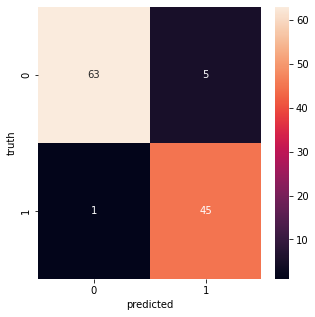

In [28]:
#plotting confusion matrix
plt.figure(figsize=(5,5))
sns.heatmap(cm,annot = True)
plt.xlabel('predicted')
plt.ylabel('truth')

###  2. KNN 

In [29]:
## fitting KNN model
knn_classifier = KNeighborsClassifier(n_neighbors = 3, metric = 'minkowski', p = 2)
knn_classifier.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=3)

In [30]:
# prediction 
y_pred=knn_classifier.predict(X_valid)
y_pred

array([1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0,
       1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
       0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0,
       0, 0, 0, 0])

In [31]:
# model performance check

#MAE 
np.mean(np.abs(y_valid-y_pred))

0.10526315789473684

In [32]:
#MSE
np.mean((y_valid-y_pred)**2)

0.10526315789473684

In [33]:
# checking accuracy 

accuracy_score(y_valid,y_pred)

0.8947368421052632

In [34]:
# Hyper parameter tuning choosing best neighbour

neighbor=np.arange(1,20,2)
mae=[]

for k in neighbor:
    knn_classifier=KNeighborsClassifier(n_neighbors = k, metric = 'minkowski', p = 2) # p=1 for manhattan,2 for euclidean
    knn_classifier.fit(X_train,y_train)
    y_pred=knn_classifier.predict(X_valid)
    mae.append(np.mean(np.abs(y_valid-y_pred)))  #MAD

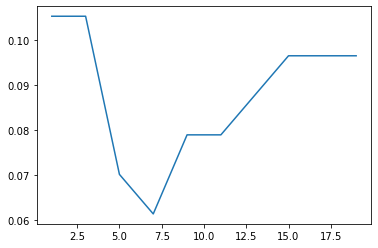

In [35]:
plt.plot(neighbor,np.array(mae))
plt.show()

##### final testing for KNN as we see for 5 neighbour its giving least error 

In [36]:
knn_classifier_fin=KNeighborsClassifier(n_neighbors = 5, metric = 'minkowski', p = 2)
knn_classifier_fin.fit(X_test,y_test)
# prediction
y_pred_fin=knn_classifier_fin.predict(X_test)
MAE=np.mean(np.abs(y_test-y_pred_fin))
MAE

0.043859649122807015

In [37]:
# checking accuracy

accuracy_score(y_test,y_pred_fin.round())

0.956140350877193

In [38]:
# constructing confusion matrix 
cm = confusion_matrix(y_test, y_pred_fin.round())

Text(24.0, 0.5, 'truth')

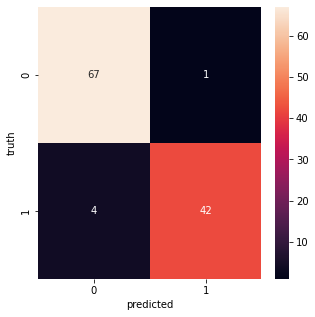

In [39]:
#plotting confusion matrix
plt.figure(figsize=(5,5))
sns.heatmap(cm,annot = True)
plt.xlabel('predicted')
plt.ylabel('truth')

### 3. Linear regression

In [40]:
linear_reg=LinearRegression(normalize=True,fit_intercept=True)
linear_reg.fit(X_train,y_train)

C:\Users\imman\anaconda3\anaconda\lib\site-packages\sklearn\linear_model\_base.py:141: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), LinearRegression())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)


  warnings.warn(


LinearRegression(normalize=True)

In [41]:
# prediction 
y_pred=linear_reg.predict(X_valid)
y_pred

array([ 1.15998385,  0.65094726,  0.44382377,  0.44498704,  0.72703281,
        0.1835908 ,  0.21572454,  0.30835263, -0.12953836,  0.56623858,
        0.0270154 ,  1.11783328,  0.20530015,  1.1273167 ,  0.21521124,
        1.03730644,  0.34239088,  0.36670407,  0.03185179,  0.97410623,
        0.83977829,  0.1668447 , -0.39944207,  0.26795789, -0.21687451,
       -0.18576143,  0.80626028, -0.0213243 ,  0.78316645,  0.05630238,
        0.12044198,  0.13300127, -0.1423866 ,  0.09005463,  0.27678811,
        1.22795059,  0.57543537, -0.03551136, -0.09350827, -0.1009231 ,
       -0.01947064,  1.44633627,  1.0331522 , -0.03107881,  0.29058146,
        0.40496943,  0.44309943, -0.11431848,  0.06181986,  0.3444867 ,
        0.86279674,  0.24991199,  0.92934522,  0.57852258,  1.30493413,
        0.13932583,  0.63974231, -0.11365245,  0.34804601,  0.6466616 ,
        0.90073453,  0.28923177,  0.7057383 , -0.20522891,  1.37308982,
        0.03614263,  0.73025983,  0.4554253 ,  1.30262828,  1.21

In [42]:
# model performance check

#MAE 
np.mean(np.abs(y_valid-y_pred))

0.20756349976124155

In [43]:
#MSE
np.mean((y_valid-y_pred)**2)

0.06890919404660917

In [44]:
# calculating r2 score
r2_score(y_valid,y_pred)

0.7038545351092151

In [45]:
# checking accuracy 

accuracy_score(y_valid,y_pred.round())

0.9649122807017544

##### final testing of model

In [46]:
linear_reg_fin=LinearRegression(normalize=True)
linear_reg_fin.fit(X_test,y_test)
# prediction 
y_pred_fin=linear_reg_fin.predict(X_test)
MAE=np.mean(np.abs(y_test-y_pred_fin))
MAE

C:\Users\imman\anaconda3\anaconda\lib\site-packages\sklearn\linear_model\_base.py:141: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), LinearRegression())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)


  warnings.warn(


0.13739176831611127

In [47]:
# checking accuracy

accuracy_score(y_test,y_pred_fin.round())

1.0

In [48]:
# constructing confusion matrix 
cm = confusion_matrix(y_test, y_pred_fin.round())

Text(24.0, 0.5, 'truth')

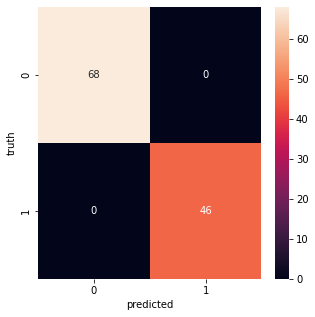

In [49]:
#plotting confusion matrix
plt.figure(figsize=(5,5))
sns.heatmap(cm,annot = True)
plt.xlabel('predicted')
plt.ylabel('truth')

## ----------------------------- scaling the data in single unit --------------------------

In [50]:
sc = StandardScaler()
X_train_sc = sc.fit_transform(X_train)
X_valid_sc = sc.transform(X_valid)

In [51]:
linear_reg_sc=LinearRegression(normalize=True,fit_intercept=True)
linear_reg_sc.fit(X_train_sc,y_train)
# prediction 
y_pred_sc=linear_reg.predict(X_valid_sc)
y_pred_sc

C:\Users\imman\anaconda3\anaconda\lib\site-packages\sklearn\linear_model\_base.py:141: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), LinearRegression())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)


  warnings.warn(
C:\Users\imman\anaconda3\anaconda\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([-3.02325499e+00,  9.44109293e+00,  1.26697655e+01, -2.95369507e+01,
        7.36202844e+00,  8.05780012e+00, -2.00661459e-02, -4.08499256e+00,
       -5.61967003e+00, -4.92594706e-01, -3.76900682e+01,  1.37057332e+01,
        1.04726239e+01,  1.17932507e+01, -1.67278485e+00,  1.78268937e+01,
       -1.24017323e+01,  8.56613788e-01, -7.88346088e+01,  6.34456659e+00,
       -2.02364635e+00, -6.97490793e+00, -2.71564900e+01,  6.62918713e-02,
       -1.05908284e+01, -1.81374121e+01,  2.95078500e+00, -2.20705296e+00,
       -5.16611566e+01, -4.12329904e+00,  9.77286897e+00,  2.10133381e+01,
       -1.80787624e+01,  3.99426038e+00,  9.57743890e+00,  1.66569368e+01,
        2.06044320e+00, -1.16633414e+01, -1.04742726e+01,  1.85117572e+01,
       -4.85749416e+00,  5.95606472e+00,  1.63178396e+00, -1.90536082e+01,
        3.18474446e+00, -3.68073272e+00,  2.48720035e+01, -3.88300239e+00,
       -8.77947236e+00,  1.92172089e+01,  1.12517391e+01, -1.41984096e+00,
       -3.58488536e-01,  

In [52]:
# checking accuracy 

accuracy_score(y_valid,y_pred_sc.round())

0.05263157894736842

In [53]:
MAE=np.mean(np.abs(y_test-y_pred_sc))
MAE

11.362214931283738